In [22]:
import whitebox
import os
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


# Whitebox Tools

In [2]:
#########################
# Initialize Whitebox
#########################

# USER MANUAL: https://whiteboxgeo.com/manual/wbt_book/preface.html

# import whitebox tools class as wbt object
wbt = whitebox.WhiteboxTools()

# toggle on/off geoprocessing tool outputs
# wbt.verbose = False

# set working directory for input/output files to current working directory
wbt.set_working_dir(os.getcwd())

# print whitebox version to verify correctly loading
wbt.version()

"WhiteboxTools v2.4.0 (c) Dr. John Lindsay 2017-2023\n\nWhiteboxTools is an advanced geospatial data analysis platform developed at\nthe University of Guelph's Geomorphometry and Hydrogeomatics Research \nGroup (GHRG). See www.whiteboxgeo.com for more details.\n"

# Slope

In [5]:
###################
# Calculate Slope
###################

# path to dem
# NOTE: Whitebox does not like relative paths!
input_dem_path = os.path.abspath(r'../data/warren/dem.tif')

# path for output slope image
output_slope_path = os.path.abspath(r'../data/warren/slope.tif')

# calculate slope
wbt.slope(dem=input_dem_path, output=output_slope_path)

./whitebox_tools --run="Slope" --wd="/Users/matthew/GitHub/cs612/code" --dem='/Users/matthew/GitHub/cs612/data/warren/dem.tif' --output='/Users/matthew/GitHub/cs612/data/warren/slope.tif' --units=degrees -v --compress_rasters=False

****************************
* Welcome to Slope         *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Pr

0

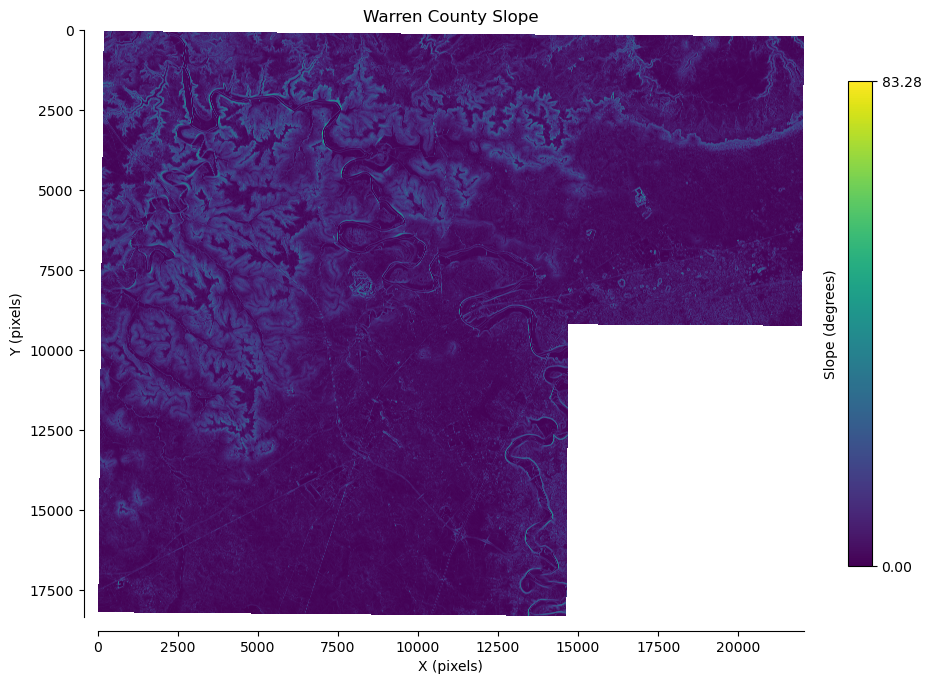

In [32]:
###################
# Visualize Slope
###################

slope_path = r'../data/warren/slope.tif'

fig, ax = plt.subplots(figsize=(10,10))

with rasterio.open(slope_path) as src:
    data = src.read(1, masked=True)
    min_val = np.min(data)
    max_val = np.max(data)
    slope = ax.imshow(data, cmap='viridis', interpolation='bilinear')
    src.close()

cbar = fig.colorbar(slope, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_ticks([min_val, max_val])
cbar.set_label('Slope (degrees)', labelpad=-70)

ax.set_title('Warren County Slope')
ax.set_xlabel('X (pixels)')
ax.set_ylabel('Y (pixels)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 10))  # Offset bottom axis
ax.spines['left'].set_position(('outward', 10))    # Offset left axis

plt.tight_layout()
plt.show()

# Profile Curvature

In [33]:
#################################
# Calculate Profile Curvature
#################################

# path to dem
input_dem_path = os.path.abspath(r'../data/warren/dem.tif')

# path for output slope image
output_slope_path = os.path.abspath(r'../data/warren/profilecurv_log_5x5.tif')

# calculate slope
wbt.profile_curvature(dem=input_dem_path, output=output_slope_path, log=True)

./whitebox_tools --run="ProfileCurvature" --wd="/Users/matthew/GitHub/cs612/code" --dem='/Users/matthew/GitHub/cs612/data/warren/dem.tif' --output='/Users/matthew/GitHub/cs612/data/warren/profilecurv_log_5x5.tif' --log -v --compress_rasters=False

*******************************
* Welcome to ProfileCurvature *
* Powered by WhiteboxTools    *
* www.whiteboxgeo.com         *
*******************************
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%


0

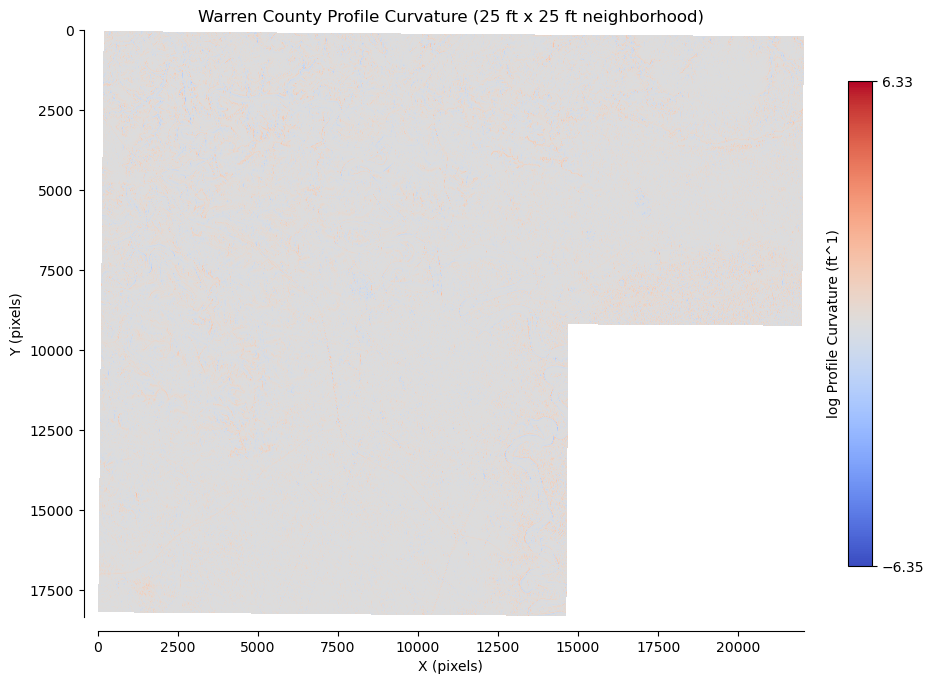

In [35]:
###############################
# Visualize Profile Curvature
###############################

pc_path = r'../data/warren/profilecurv_log_5x5.tif'

fig, ax = plt.subplots(figsize=(10,10))

with rasterio.open(pc_path) as src:
    data = src.read(1, masked=True)
    min_val = np.min(data)
    max_val = np.max(data)
    slope = ax.imshow(data, cmap='coolwarm', interpolation='bilinear', )
    src.close()

cbar = fig.colorbar(slope, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_ticks([min_val, max_val])
cbar.set_label('log Profile Curvature (ft^1)', labelpad=-70)

ax.set_title('Warren County Profile Curvature (25 ft x 25 ft neighborhood)')
ax.set_xlabel('X (pixels)')
ax.set_ylabel('Y (pixels)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 10))  # Offset bottom axis
ax.spines['left'].set_position(('outward', 10))    # Offset left axis

plt.tight_layout()
plt.show()